# Unsupervised methods

### Preprocess the dataset for clustering algorithms.

Using only selected features
Transform the features to follow a normal distribution

In [1]:
import pandas as pd

df = pd.read_csv('temp/Delivery_truck_trip_data_df.csv')

In [2]:
df.reset_index(drop=True, inplace=True)
X = df.drop(['ontime'], axis=1)
y = df['ontime']

from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
X = qt.fit_transform(X)

### Create a Table of performance

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

table_of_performance = pd.DataFrame(columns=['algorithm', 'confusion matrix', 'accuracy', 'precision', 'recall', 'rand index', 'mutual information based score', 'homogeneity', 'completeness', 'v-measure'])

def add_performance(algorithm, y, y_predict):
    global table_of_performance

    cm = confusion_matrix(y, y_predict)
    accuracy = accuracy_score(y, y_predict)
    precision = precision_score(y, y_predict)
    recall = recall_score(y, y_predict)
    rand_index = rand_score(y, y_predict)
    mutual_info_score = adjusted_mutual_info_score(y, y_predict)
    homogeneity = homogeneity_score(y, y_predict)
    completeness = completeness_score(y, y_predict)
    v_measure = v_measure_score(y, y_predict)
    
    new_row = {'algorithm': algorithm, 'confusion matrix': cm, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'rand index': rand_index, 'mutual information based score': mutual_info_score, 'homogeneity': homogeneity, 'completeness': completeness, 'v-measure': v_measure}

    table_of_performance.loc[len(table_of_performance)] = new_row

### Visualization of clustering after PCA

<Axes: xlabel='x', ylabel='y'>

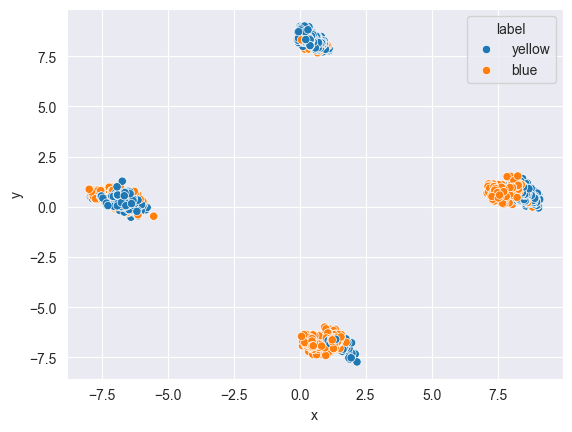

In [4]:
from sklearn.decomposition import  PCA
import numpy as np

pca = PCA(n_components=2)
pct = pca.fit_transform(X)

pct = np.delete(pct, 6745, 0)
y_new = np.delete(y.to_numpy(), 6745, 0)

y_new = ['yellow' if elem else 'blue' for elem in y_new]

data = pd.concat([pd.DataFrame(pct), pd.DataFrame(y_new)], axis=1)

data.columns = ['x', 'y', 'label']
import seaborn as sns

sns.scatterplot(data=data, x="x", y="y", hue="label")

### KMeans

/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

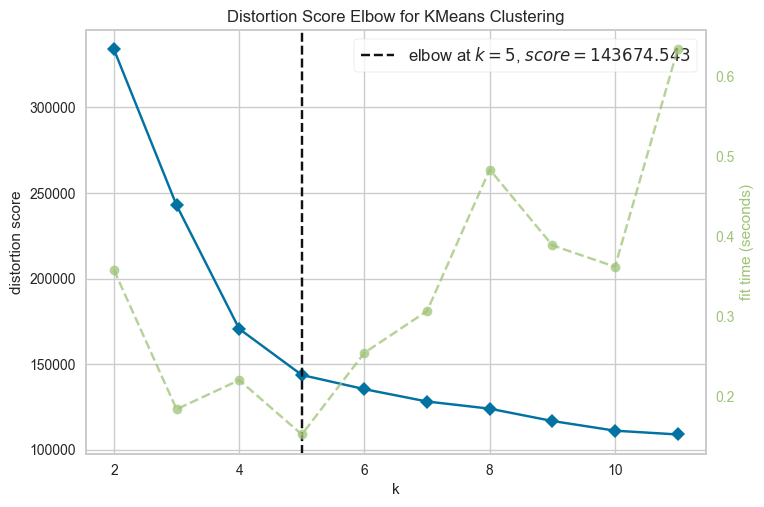

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

The optimal number of clusters is 5.

In [6]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=10, random_state=103)
k_means.fit(X)

from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

from sklearn.metrics.pairwise import pairwise_distances_argmin_min

k_means_distances_df = pd.DataFrame(pairwise_distances_argmin_min(X, k_means_cluster_centers)).T
k_means_distances_df.columns = ['cluster', 'distance']
y_predict = k_means_distances_df['cluster'].map({0: False, 1: True})
add_performance('KMeans', y, y_predict)

### Affinity Propagation

In [7]:
'''
from scipy.spatial.distance import pdist

max(pdist(X))
'''

'\nfrom scipy.spatial.distance import pdist\n\nmax(pdist(X))\n'

In [8]:
'''
from sklearn.cluster import AffinityPropagation

pca = PCA(n_components=3)
pct = pca.fit_transform(X)
af = AffinityPropagation(random_state=0).fit(pct)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
len(cluster_centers_indices)
'''

'\nfrom sklearn.cluster import AffinityPropagation\n\npca = PCA(n_components=3)\npct = pca.fit_transform(X)\naf = AffinityPropagation(random_state=0).fit(pct)\ncluster_centers_indices = af.cluster_centers_indices_\nlabels = af.labels_\nlen(cluster_centers_indices)\n'

Can't specify the number of clusters

### Mean Shift

In [9]:
'''
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.3)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
'''

'\nfrom sklearn.cluster import MeanShift, estimate_bandwidth\n\nbandwidth = estimate_bandwidth(X, quantile=0.3)\n\nms = MeanShift(bandwidth=bandwidth, bin_seeding=True)\nms.fit(X)\nlabels = ms.labels_\ncluster_centers = ms.cluster_centers_\n'

In [10]:
'''
mean_shift_distances_df = pd.DataFrame(pairwise_distances_argmin_min(X, cluster_centers)).T
mean_shift_distances_df.columns = ['cluster', 'distance']
mean_shift_distances_df = pd.concat([mean_shift_distances_df, y], axis=1)
print(mean_shift_distances_df.groupby(['cluster', 'ontime']).mean())
print(mean_shift_distances_df.groupby(['cluster', 'ontime']).count())
'''

"\nmean_shift_distances_df = pd.DataFrame(pairwise_distances_argmin_min(X, cluster_centers)).T\nmean_shift_distances_df.columns = ['cluster', 'distance']\nmean_shift_distances_df = pd.concat([mean_shift_distances_df, y], axis=1)\nprint(mean_shift_distances_df.groupby(['cluster', 'ontime']).mean())\nprint(mean_shift_distances_df.groupby(['cluster', 'ontime']).count())\n"

In cluster 1 and 3, most are on time. In cluster 2, most are not on time. In clusters 0, almost half of the points are anomalies.

In cluster 2, almost half are anomalies. In cluster 0 and 3, most are not anomalies. In cluster 1 most are anomalies.

### Hierarchical clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(n_clusters=2).fit(X)

In [12]:
hierarchical_clustering_labels_df = pd.DataFrame(hierarchical_clustering.labels_, columns=['cluster'])
hierarchical_clustering_labels_df = pd.concat([hierarchical_clustering_labels_df, y], axis=1)
print(pd.DataFrame(hierarchical_clustering_labels_df.value_counts()))

y_predict = hierarchical_clustering_labels_df['cluster'].map({0: False, 1: True})
add_performance('hierarchical clustering', y, y_predict)

                count
cluster ontime       
1       True     2358
0       False    2119
        True     1872
1       False     401


### HDBSCAN

In [13]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(min_cluster_size=20)
hdb.fit(X)

HDBSCAN(min_cluster_size=20)

In [14]:
hdbscan_labels_df = pd.DataFrame(hdb.labels_, columns=['clusters'])
hdbscan_labels_df = pd.concat([hdbscan_labels_df, y], axis=1)
hdbscan_labels_df[hdbscan_labels_df.clusters==-1].value_counts()

clusters  ontime
-1        True      557
          False     223
Name: count, dtype: int64

In [15]:
y_predict = hdbscan_labels_df['clusters'].map(lambda x: x >= 0)
add_performance('HDBSCAN', y, y_predict)

HDBSCAN doesn't work well.

### OPTICS

In [16]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=2).fit(X)

/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [17]:
optics_labels_df = pd.DataFrame(optics.labels_, columns=['clusters'])
optics_labels_df = pd.concat([optics_labels_df, y], axis=1)
optics_labels_df.value_counts()

clusters  ontime
-1        True      1185
          False      715
 1298     True         8
 181      False        8
 911      True         8
                    ... 
 238      True         1
 1370     False        1
 460      True         1
 463      False        1
 279      False        1
Name: count, Length: 1958, dtype: int64

In [18]:
y_predict = optics_labels_df['clusters'].map(lambda x: x >= 0)
add_performance('OPTICS', y, y_predict)

### BIRCH

In [19]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=2)
brc.fit(X)
brc.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
brc_labels_df = pd.DataFrame(brc.labels_, columns=['cluster'])
brc_labels_df = pd.concat([brc_labels_df, y], axis=1)
print(brc_labels_df.value_counts())

y_predict = brc_labels_df['cluster'].map({1: False, 0: True})
add_performance('BIRCH', y, y_predict)

cluster  ontime
1        True      2358
0        False     2119
         True      1872
1        False      401
Name: count, dtype: int64


### Spectral clustering

In [21]:
'''
from sklearn.cluster import SpectralClustering
import joblib

spectral_clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(X)
joblib.dump(spectral_clustering, 'temp/Delivery_truck_trip_data_spectral_clustering_model.pkl')
'''

"\nfrom sklearn.cluster import SpectralClustering\nimport joblib\n\nspectral_clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(X)\njoblib.dump(spectral_clustering, 'temp/Delivery_truck_trip_data_spectral_clustering_model.pkl')\n"

In [22]:
# loaded_model = joblib.load('temp/Delivery_truck_trip_data_spectral_clustering_model.pkl')

In [23]:
'''
print(pd.DataFrame(loaded_model.labels_).value_counts())
spectral_clustering_labels_df = pd.DataFrame(spectral_clustering.labels_, columns=['cluster'])
spectral_clustering_labels_df = pd.concat([spectral_clustering_labels_df, y], axis=1)
print(spectral_clustering_labels_df['cluster'].value_counts())
print(spectral_clustering_labels_df.value_counts())
print(spectral_df.value_counts())
'''

"\nprint(pd.DataFrame(loaded_model.labels_).value_counts())\nspectral_clustering_labels_df = pd.DataFrame(spectral_clustering.labels_, columns=['cluster'])\nspectral_clustering_labels_df = pd.concat([spectral_clustering_labels_df, y], axis=1)\nprint(spectral_clustering_labels_df['cluster'].value_counts())\nprint(spectral_clustering_labels_df.value_counts())\nprint(spectral_df.value_counts())\n"

### Performance

In [24]:
table_of_performance.to_csv('temp/Delivery_truck_trip_data_unfiltered_unsupervised_performance.csv', index=False)